# Выбросы. Критерий Шовене

Суть критерия Шовене заключается в проверке неравенства, которое  приведено в следующей формуле:
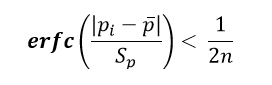


где

pi – i-тое значение ряда

p̄ — среднее значение ряда

Sp – стандартное отклонение ряда

n – число наблюдений ряда

erfc – это дополнительная функция ошибок на основе интеграла вероятности или Пуассона, который, в свою очередь, применяется в теории вероятности.

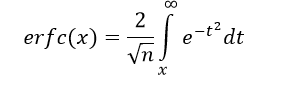

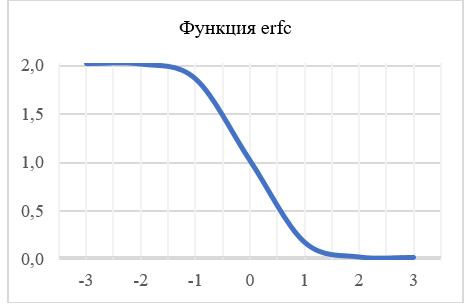

Согласно графику функции erfc, с возрастанием аргумента значение функции стремятся к нулю. Таким образом, если в левой части выражения в скобках будет слишком большое число, то  искомое значение (pi) будет выбросом. Если неравенство выполняется, то значение pi является аномальным выбросом.

Поиск выбросов с помощью критерия Шовене является итерационной процедурой, которая подразумевает удаление аномального выброса после очередной итерации и последующего обнаружения выбросов на оставшихся данных. Процедура завершается в момент, когда неравенство перестает выполняться. Считается, что в момент остановки в ряду не осталось выбросов.

In [ ]:
import math 
import statistics as st 
import pandas as pd
import numpy as np

def shovene(data):
    df=data.iloc[:, 0].tolist()
    iteration_counter = 0
    pp=[ ] #запишем выбросы  переменную
    while True and len(df) > 1:
        iteration_counter += 1
        stop_iter = True
        p_mean = st.mean(df)
        p_stdev = st.stdev(df)
        print("Итерация:", iteration_counter)# распечатывается номер итерации
        for p in list(df):
            if p_stdev > 0 and\
                math.erfc (math.fabs (p-p_mean)/p_stdev)<1/(2*len(df)):
                print("Обнаружена аномалия:", p)# распечатывается факт аномального выброса
                pp.append(p)
                df.remove(p)
                stop_iter = False
        if stop_iter:
            break
    d_float=np.array(pp, dtype=np.float32)
    return round((len(d_float)/len(data)*100),2), d_float

In [ ]:
# Применяем функцию и получаем результат:
dd=shovene(df)
print('Шовене - процент выбросов',dd[0])# отображение процента выбросов
print('Шовене - выбросы',dd[1])# отображаются собственно выбросы

Необходимо иметь ввиду, что монотонно возрастающий ряд не поддается детектированию в части аномалий (например,  временной ряд).

В целом, критерий Шовене не является панацеей при решении проблем очистки данных от аномальных выбросов, но вполне может использоваться в качестве своеобразного экспресс – метода определения грубых выбросов. Например, с его помощью можно в оперативном порядке оценивать качество данных перед их разведочным анализом или проводить периодическую ревизию пополняемых на постоянной основе баз данных на предмет ошибочного заполнения тех или иных данных.